# Principal Component Analysis

In [25]:
from sklearn.datasets import load_breast_cancer
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## The dataset
For this project we will use some numerical data about breast tumors collected by clinicians. The dataset can be directly downloaded and accessed through `sklearn`with the following commands

In [22]:
breast_cancer_data = load_breast_cancer()
X = breast_cancer_data['data']
Y = breast_cancer_data['target']
X.shape

(569, 30)

We would like to reduce the number of features of the dataset to 2 principal components in order to plot the dataset in a 2d plot and visualize the classes in a comprehensive way.

## Theory of PCA

### Definition
Principal component analysis (PCA) is a statistical procedure that uses an **orthogonal transformation** to convert a set of observations of possibly correlated variables [...] into a set of values of linearly **uncorrelated variables** called principal components. [...]  This transformation is defined in such a way that the first principal component has the largest possible variance (that is, accounts for as much of the variability in the data as possible), and each succeeding component in turn has the highest variance possible under the constraint that it is orthogonal to the preceding components. (<cite>Wikipedia</cite>)

### Mean-centering the data
Suppose to have a $d$-dimensional dataset $\mathbf{X}$ composed of $n$ samples. We firstly center the data points around the mean of the features $\mu$, calculated as follows:

$$
\mu = \frac{1}{n} \sum_{i=1}^n x_i
= (\frac{1}{n} \sum_{i=1}^n x_{i1}, \ldots, \frac{1}{n} \sum_{i=1}^n x_{id} )^T
$$

The centered dataset is now
$$
X =  \left(
    \begin{array}{ccccc}
        && x_1^T - \mu^T && \\
        \hline
        && x_2^T - \mu^T && \\
        \hline
        && \vdots && \\
        \hline
        && x_n^T - \mu^T &&
    \end{array}
\right)\,.
$$

### The covariance matrix
Since the dataset is now mean-centered, we can write the sample covariance of the dataset as follows:
$$
S_{m \times m} = \frac{1}{n-1} \sum_{i=1}^n (x_i-\mu)(x_i-\mu)^T = \frac{1}{n-1} X^T X
$$

### Principal components
The goal of PCA is to find a collection of $k \leq d$ unit vectors $v_i \in \mathbb{R}^d$ called *princial components* such that:
1. the variance of the dataset projected onto the direction determined by $v_i$ is maximized and
2. $v_i$ is chosen to be orthogonal to $v_1, ..., v_{i-1}$

Since the projection of a vector $x \in \mathbb{R}^d$ on $v_i$ is simply $v_i^Tx$, the variance of the projected dataset onto $v_i$ is
$$
\frac{1}{n-1}\sum_{j=1}^{n}(v_i^Tx_j-v_i^T\mu)^2 = v_i^TSv_i.
$$

In order to *maximize* this quantity, with the additional constraint of $||v_i|| = 1$, we can use the method of Lagrange multipliers, leading to 
$$
\text{maximize}\{v_i^TSv_i - \lambda(v_i^Tv_i - 1)\}
$$

This is solved by solving the following equation
$$
Sv_i = \lambda_iv_i
$$

### Eigen-value decomposition
This simply means that $v_i$ is an **eigen-vector** of the covariance matrix $S$ and since $||v_i|| = 1$ we also conclude that $\lambda_i$ is equal to the variance of the dataset along $v_i$.

We can do this operation for all the rest of eigen-vectors obtaining the eigen-vector matrix $\mathbf{V}_{d \times d}$

The transformed dataset will be
$$
\mathbf{X_t} = \mathbf{X}\mathbf{V}
$$

In [70]:
feature_means = np.mean(X, axis = 0)
mean_centered_X = X - feature_means[np.newaxis]
covariance_matrix = np.cov(mean_centered_X.T)

In [71]:
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

In [72]:
X_t = mean_centered_X.dot(eigen_vectors)

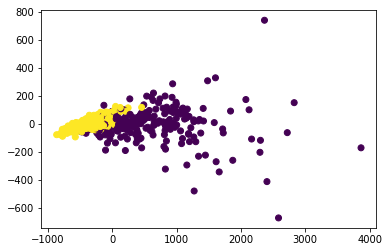

In [73]:
plt.figure()
plt.scatter(X_t[:, 0], X_t[:, 1], c=Y)
plt.show()